## 1.Profiling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles
from scipy.stats import alpha

df = pd.read_csv('Data/wine.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Label                  178 non-null    object 
 1   Grape Type             178 non-null    object 
 2   Alcohol                178 non-null    float64
 3   Malic Acid             178 non-null    float64
 4   Ash Content            177 non-null    float64
 5   Ash Alkalinity         178 non-null    float64
 6   Magnesium              178 non-null    int64  
 7   Total Phenols          178 non-null    float64
 8   Flavonoids             178 non-null    float64
 9   Non-Flavonoid Phenols  178 non-null    float64
 10  Proanthocyanins        178 non-null    float64
 11  Color Intensity        178 non-null    float64
 12  Hue                    178 non-null    float64
 13  Phenol Ratio           178 non-null    float64
 14  Proline                178 non-null    int64  
 15  Class 

,Label,Grape Type,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Class
0,Frappato Sicily 1982,Nebbiolo,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,Barolo
1,Taurasi Umbria 1989,Nebbiolo,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,Barolo
2,Sagrantino Umbria 1994,Barbera,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,Barbera
3,Morellino Veneto 2015,Nebbiolo,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,Barolo
4,Vino Nobile di Montepulciano Umbria 2008,Nebbiolo,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,Barbaresco


In [2]:
df.sort_values(by=['Alcohol'], ascending=False).iloc[0]

Label                    Aglianico Campania 1994
Grape Type                              Nebbiolo
Alcohol                                    14.83
Malic Acid                                  1.64
Ash Content                                 2.17
Ash Alkalinity                              14.0
Magnesium                                     97
Total Phenols                                2.8
Flavonoids                                  2.98
Non-Flavonoid Phenols                       0.29
Proanthocyanins                             1.98
Color Intensity                              5.2
Hue                                         1.08
Phenol Ratio                                2.85
Proline                                     1045
Class                                     Barolo
Name: 134, dtype: object

## Profiling: Learn to understand your data better

In [3]:
df.describe()

,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline
count,178.000000,178.000000,177.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366893,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.275076,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.560000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
# but non-numerical features are equally important in data profiling
df.describe(include='object')

,Label,Grape Type,Class
count,178,178,178
unique,178,2,3
top,Frappato Sicily 1982,Nebbiolo,Barbaresco
freq,1,130,71


### correlation analysis

#### 1. Correlation Matrix(Heatmap)

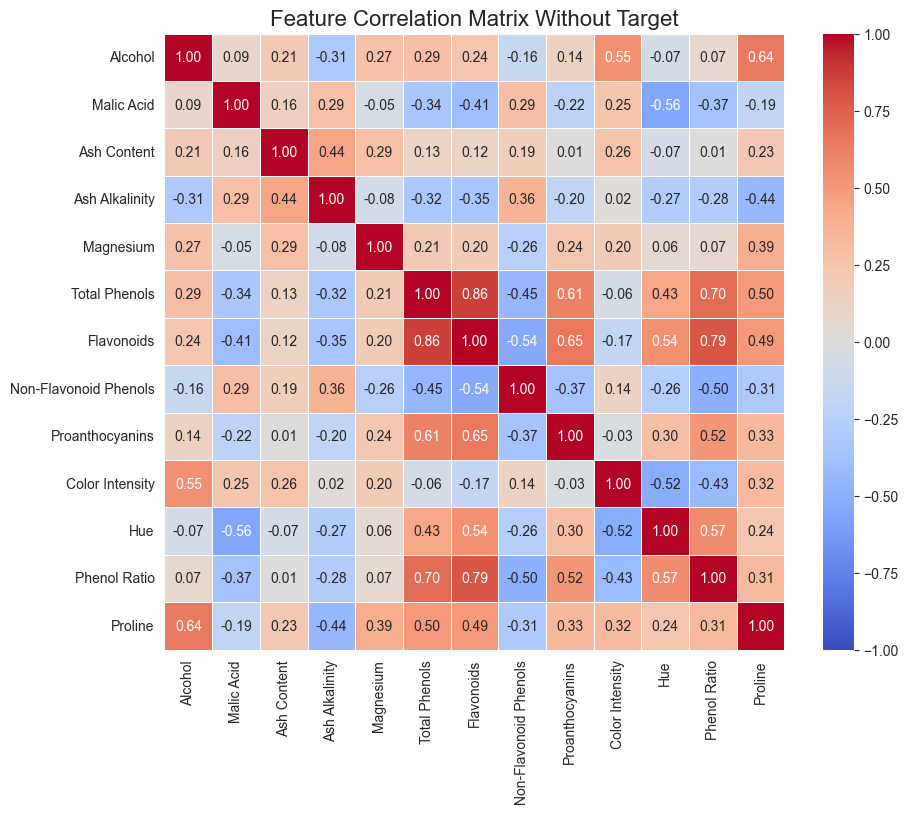

In [5]:
import seaborn as sns
# for columns with numerical data types
corr_matix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax= 1)
plt.title("Feature Correlation Matrix Without Target", fontsize= 16)
plt.show()

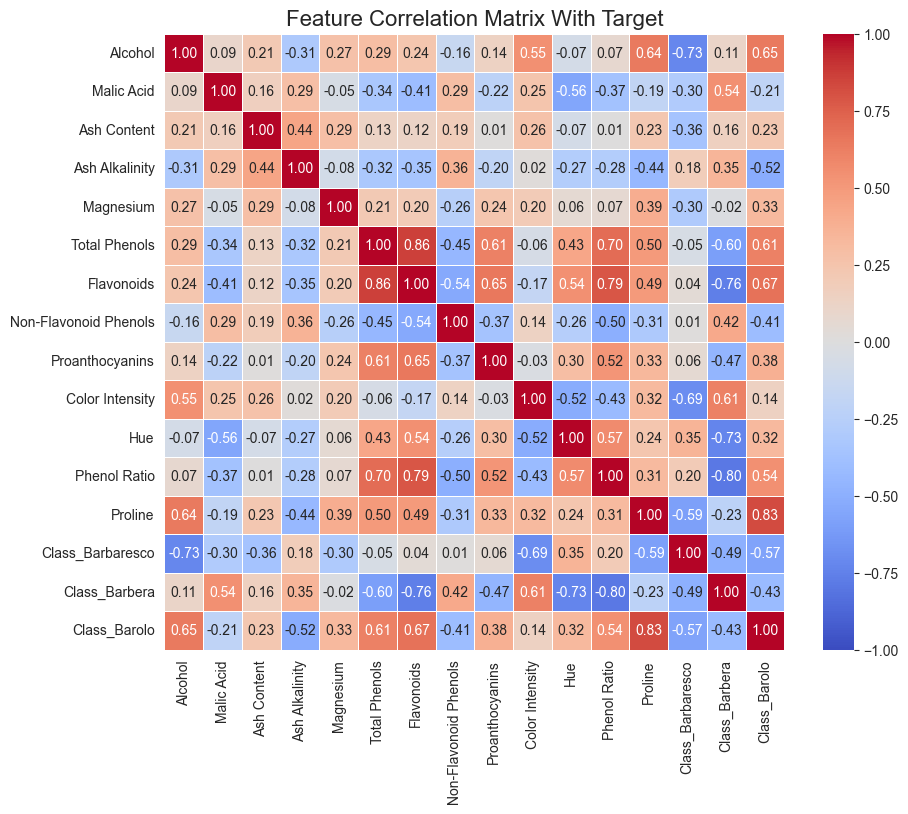

In [6]:
## we want to include 'class', we need one-hot encode
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded,prefix='Class', columns=['Class'],dtype=int)
corr_matix = df_encoded.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matix,vmin=-1, vmax=1,annot=True, fmt='.2f',cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix With Target", fontsize= 16)
plt.show()

### 2.Scatter Plots with Target Coding

                                      Label Grape Type  Alcohol  Malic Acid  \
0                      Frappato Sicily 1982   Nebbiolo    13.64        3.10   
1                       Taurasi Umbria 1989   Nebbiolo    14.21        4.04   
2                    Sagrantino Umbria 1994    Barbera    12.93        2.81   
3                     Morellino Veneto 2015   Nebbiolo    13.73        1.50   
4  Vino Nobile di Montepulciano Umbria 2008   Nebbiolo    12.37        1.17   

   Ash Content  Ash Alkalinity  Magnesium  Total Phenols  Flavonoids  \
0         2.56            15.2        116           2.70        3.03   
1         2.44            18.9        111           2.85        2.65   
2         2.70            21.0         96           1.54        0.50   
3         2.70            22.5        101           3.00        3.25   
4         1.92            19.6         78           2.11        2.00   

   Non-Flavonoid Phenols  Proanthocyanins  Color Intensity   Hue  \
0                   0.17

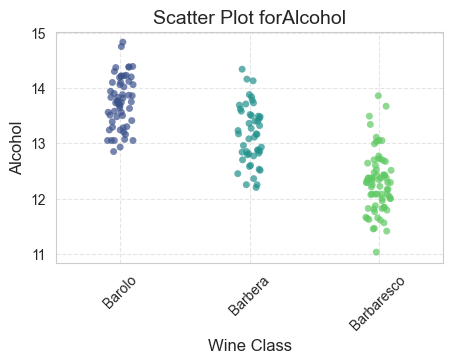

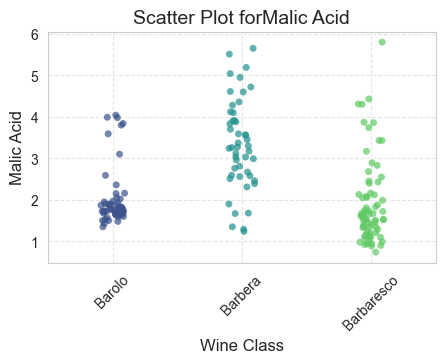

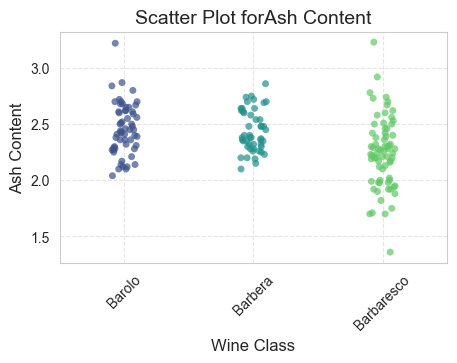

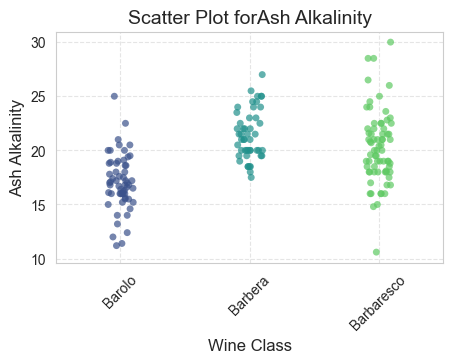

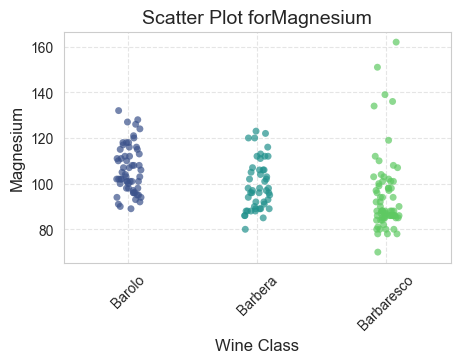

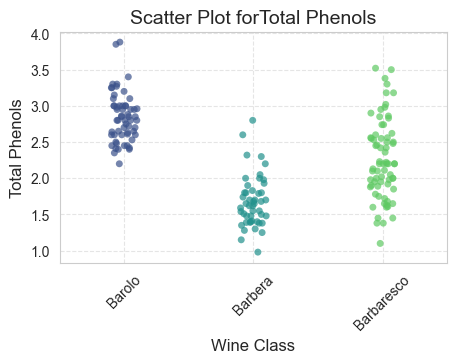

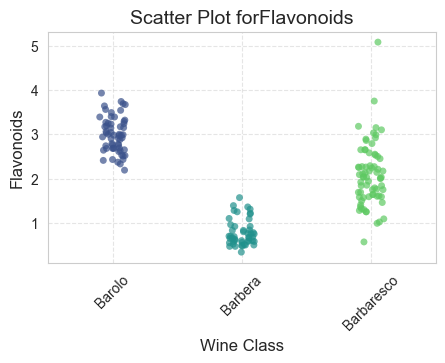

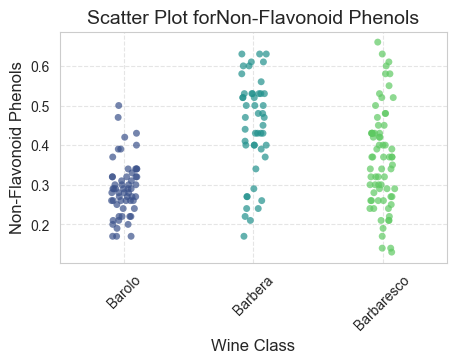

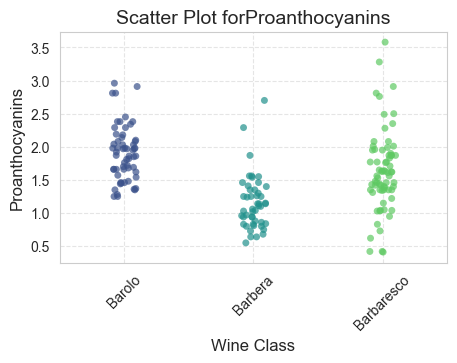

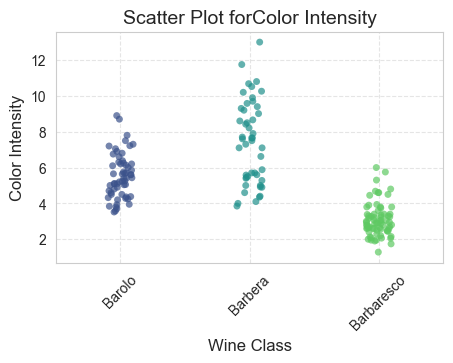

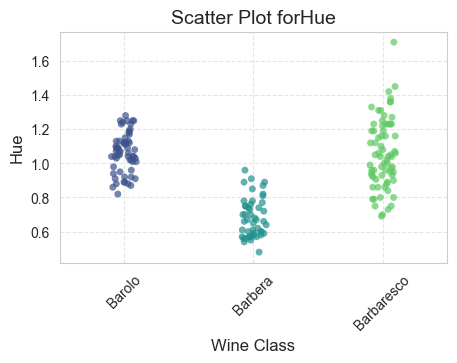

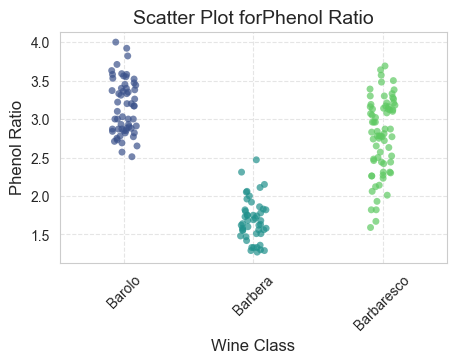

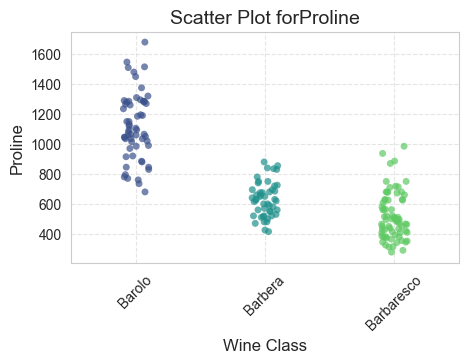

In [7]:
print(df.head(5))
# Iterate over numerical features and plot them against the target
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(5,3))
    sns.stripplot(x= df['Class'], y=df[col],hue=df["Class"], jitter=True, alpha= 0.7, palette = 'viridis')
    plt.title(f"Scatter Plot for{col}", fontsize= 14)
    plt.xlabel('Wine Class', fontsize= 12)
    plt.ylabel(col, fontsize= 12)
    plt.xticks(rotation= 45)
    plt.grid(True, linestyle= '--', alpha= 0.5)
    plt.show()


### 3.Boxplots by Target Class


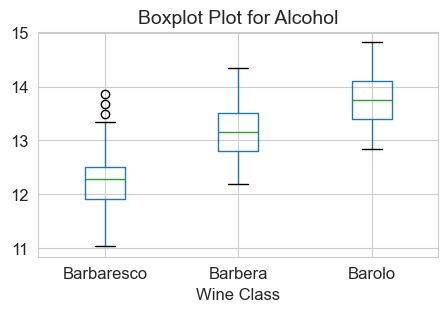

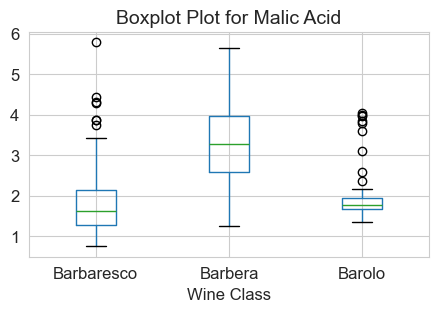

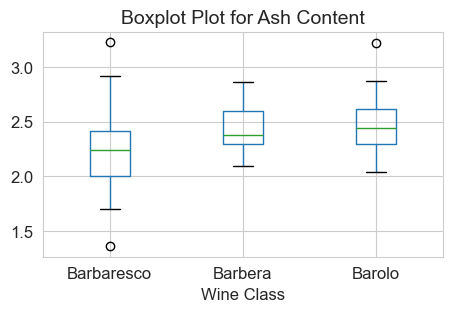

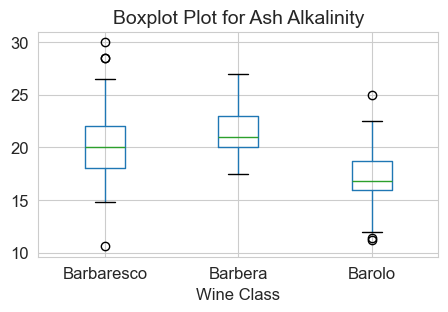

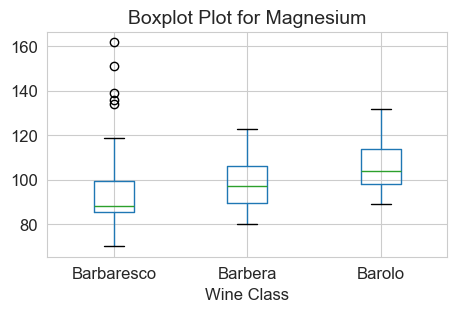

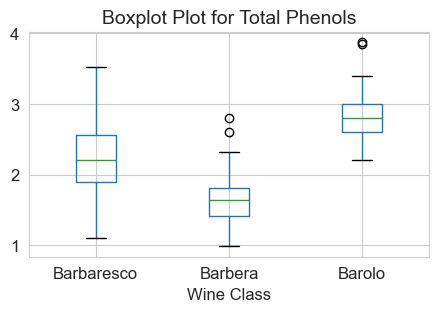

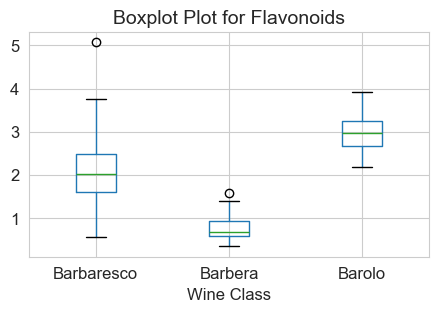

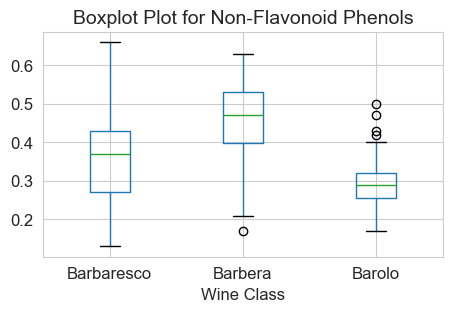

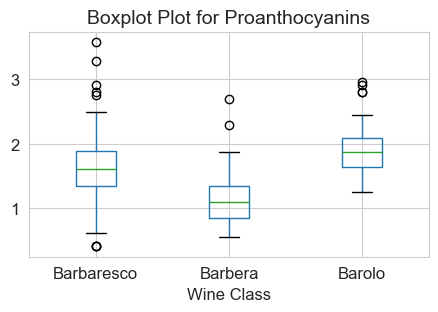

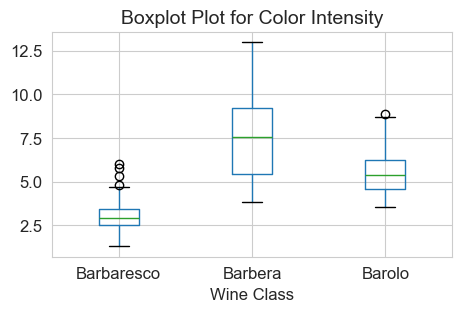

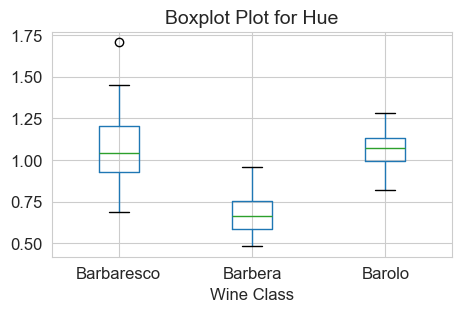

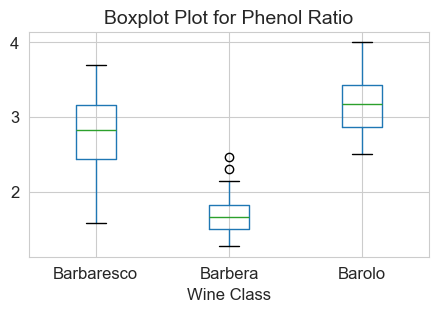

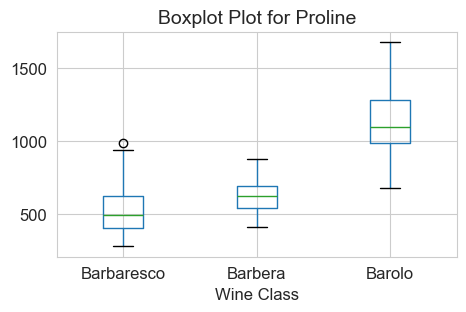

In [8]:
for col in df.select_dtypes(include=['number']).columns:
    df.boxplot(col, by='Class', figsize=(5,3), fontsize=12)
    plt.title(f"Boxplot Plot for {col}", fontsize= 14)
    plt.xlabel("Wine Class", fontsize = 12)

    plt.suptitle('')
    plt.suptitle('')

### 4.Scatter Plots with Target Color Coding

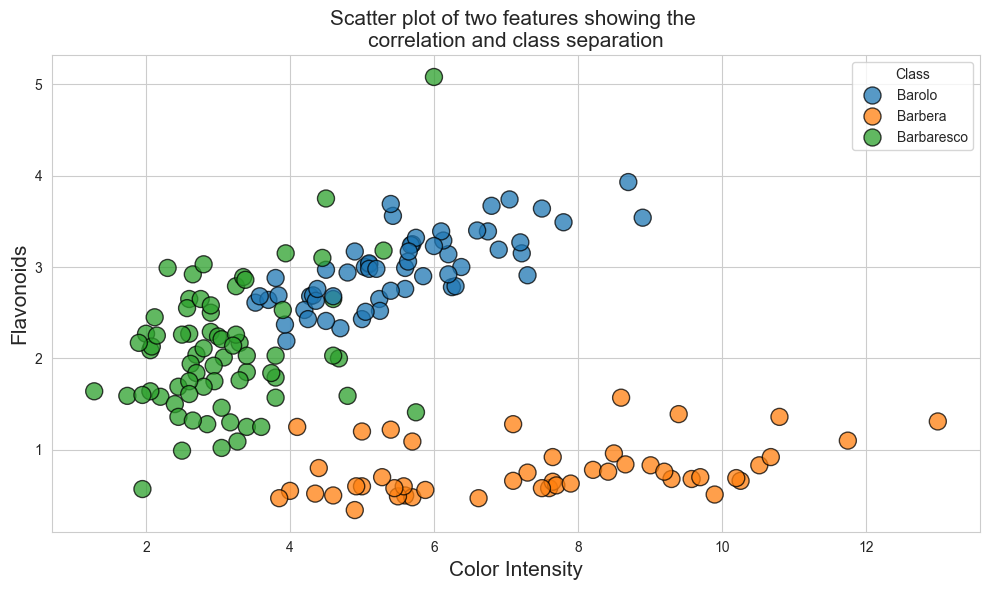

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= df, x= 'Color Intensity',
                y= 'Flavonoids', hue='Class',
                alpha= 0.75,#调整透明度
                s= 150,#调整点的大小
                edgecolor= 'black'#设置边缘颜色
                )
plt.title("Scatter plot of two features showing the \ncorrelation and class separation", fontsize= 15)
plt.xlabel("Color Intensity", fontsize=15)
plt.ylabel("Flavonoids", fontsize=15)
plt.tight_layout()# 调整布局，防止元素重叠
plt.show()

## Preprocessing

In [22]:
df.describe()

,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline
count,178.000000,178.000000,177.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366893,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.275076,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.560000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [23]:
df.describe(include='object')

,Label,Grape Type,Class
count,178,178,178
unique,178,2,3
top,Frappato Sicily 1982,Nebbiolo,Barbaresco
freq,1,130,71


In [27]:
df = pd.read_csv('Data/wine.csv')
print(df.describe(include='object'))

df_encoded = df.copy()

df_encoded = pd.get_dummies(df_encoded, columns=['Grape Type'], dtype=int)

df_encoded = df_encoded.drop(columns=['Label'])
print("Processed Feature DataFrame")
df_encoded.head()

                       Label Grape Type       Class
count                    178        178         178
unique                   178          2           3
top     Frappato Sicily 1982   Nebbiolo  Barbaresco
freq                       1        130          71
Processed Feature DataFrame


,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Class,Grape Type_Barbera,Grape Type_Nebbiolo
0,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,Barolo,0,1
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,Barolo,0,1
2,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,Barbera,1,0
3,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,Barolo,0,1
4,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,Barbaresco,0,1


In [28]:
df_encoded = pd.get_dummies(df_encoded, columns=["Class"], dtype= int)

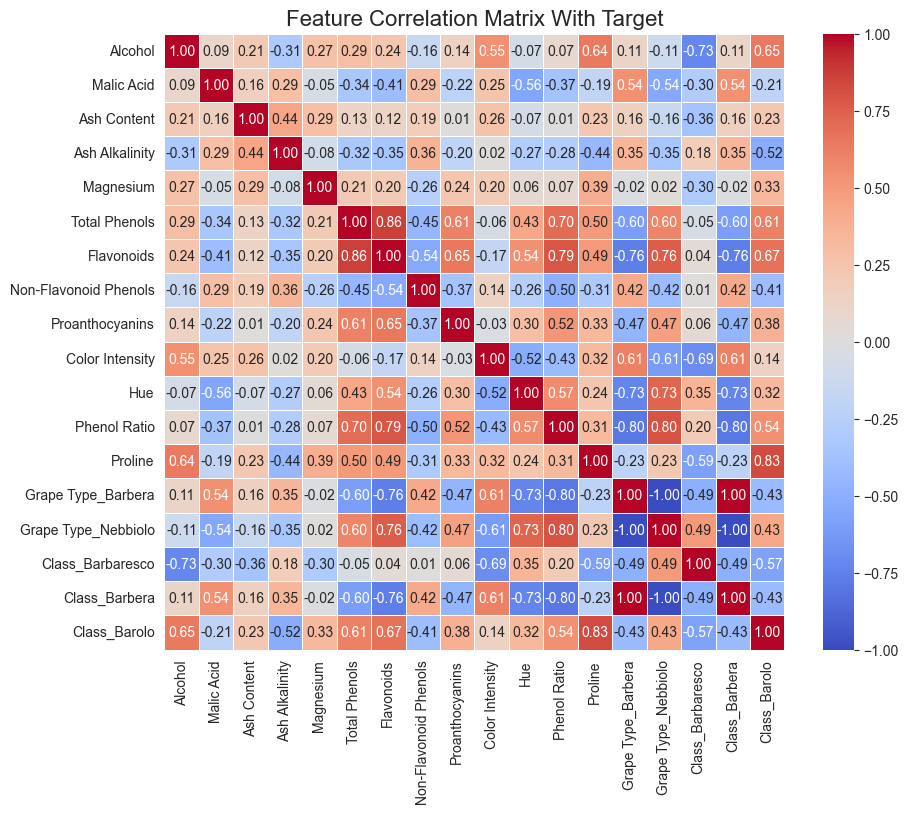

In [29]:
corr_matix = df_encoded.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matix,vmin= -1, vmax= 1, annot= True, cmap="coolwarm", fmt=".2f", linewidths= 0.5)
plt.title("Feature Correlation Matrix With Target", fontsize= 16)
plt.show()

In [30]:
df = df.drop(columns=['Grape Type'], errors= 'ignore')
df.head()

,Label,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Class
0,Frappato Sicily 1982,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,Barolo
1,Taurasi Umbria 1989,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,Barolo
2,Sagrantino Umbria 1994,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,Barbera
3,Morellino Veneto 2015,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,Barolo
4,Vino Nobile di Montepulciano Umbria 2008,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,Barbaresco


### 1. identify missing values

In [39]:
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
print(missing_summary)

Ash Content    1
dtype: int64


In [44]:
df[df["Ash Content"].isnull()] #找到有缺失值的一行

,Label,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Class
73,Brachetto Campania 2015,14.1,2.16,NaN,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,Barolo


In [46]:
df_temp = df.copy()
df_temp.fillna(df_temp.mean(numeric_only= True), inplace= True)

df_temp[df_temp["Label"]=="Brachetto Campania 2015"]

,Label,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline,Class
73,Brachetto Campania 2015,14.1,2.16,2.366893,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,Barolo


### 2.Splitting Data into Training and Test Sets

In [48]:
X = df.drop(columns=['Class', 'Label'], errors='ignore')
y = df['Class']
X.head()

,Alcohol,Malic Acid,Ash Content,Ash Alkalinity,Magnesium,Total Phenols,Flavonoids,Non-Flavonoid Phenols,Proanthocyanins,Color Intensity,Hue,Phenol Ratio,Proline
0,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
2,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
3,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
4,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, train_size= 0.8, random_state= 42)

print("Number of total entries:", len(X))
print("Number of train entries:", len(X_train))
print("Number of test entries:", len(X_test))

missing_summary = X_train.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
print("Missing Values per Column: \n", missing_summary)


Number of total entries: 178
Number of train entries: 142
Number of test entries: 36
Missing Values per Column: 
 Ash Content    1
dtype: int64


In [52]:
X_train.fillna(X_train.mean(numeric_only = True), inplace= True)

NameError: name 'X_trian' is not defined